# Decision Tree Regression

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")

In [22]:
df = sns.load_dataset('iris')

In [23]:
 df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [24]:
# independent and dependent features:-
X = df.iloc[:,:-1]
y = df.iloc[:,-1:]

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [90]:
y_train

array([1, 2, 1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0,
       2, 2, 1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2,
       2, 1, 0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2,
       1, 2, 1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2,
       1, 2, 1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

## Post Pruning

In [91]:
treeModel = DecisionTreeRegressor(max_depth=1)

In [103]:
le = preprocessing.LabelEncoder()
le.fit(y_train)
y_train_encoded = le.transform(y_train)
le.fit(y_test)
y_test_encoded = le.transform(y_test)

In [92]:
treeModel.fit(X_train,y_train_encoded)

DecisionTreeRegressor(max_depth=1)

In [93]:
from sklearn.tree import plot_tree 

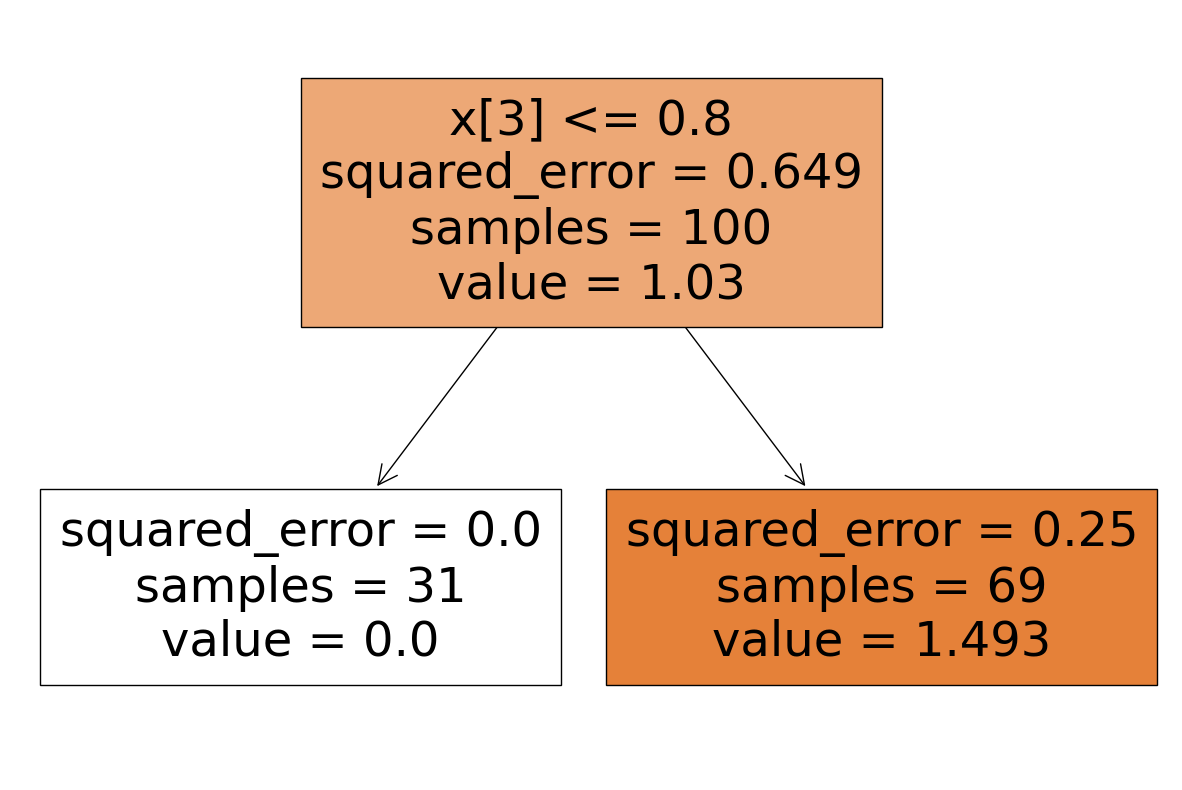

In [94]:
plt.figure(figsize=(15,10))
plot_tree(treeModel,filled=True)
plt.show()

observation: at depth we get most of the information but still dicision Tree continue the unnessary split
so, 
we do max_depth = 2

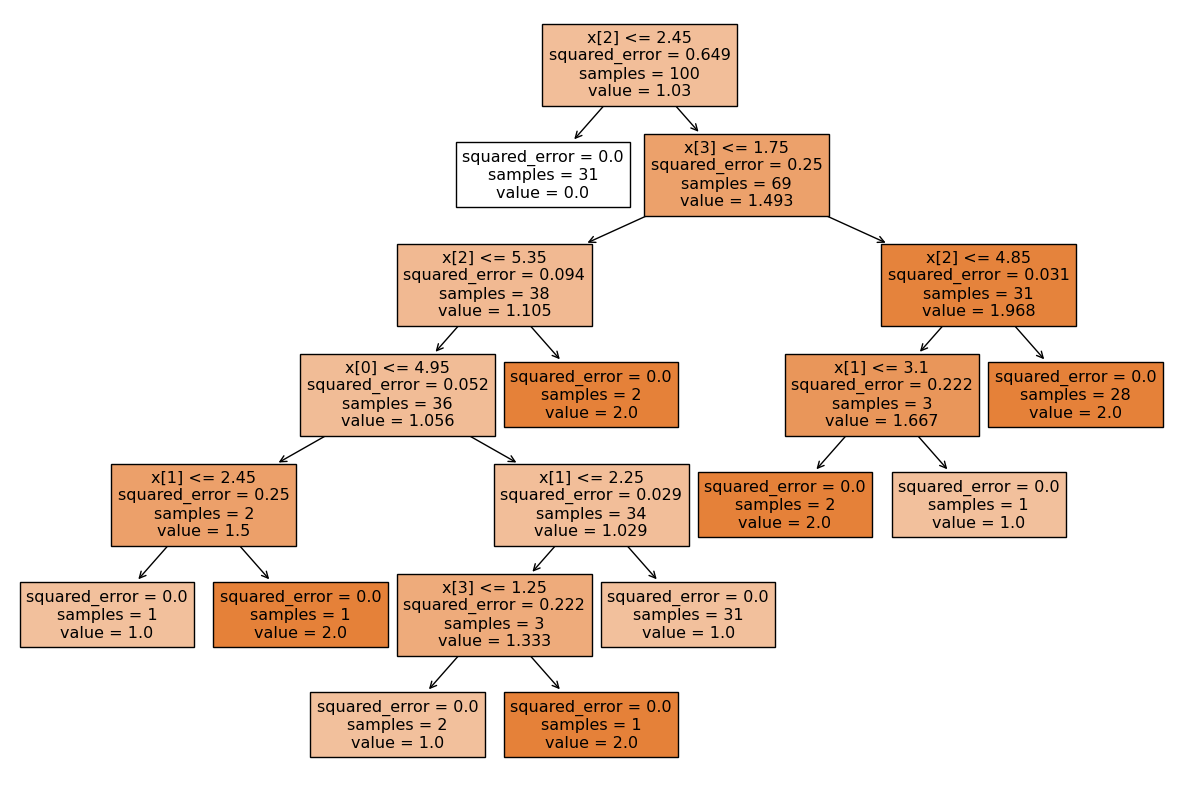

In [58]:
plt.figure(figsize=(15,10))
plot_tree(treeModel,filled=True)
plt.show()

observation: if any new data comes in green then it becomes versicolor  and if it goes into purple it becomes virginica

In [59]:
## prediction:-

y_pred = treeModel.predict(X_test)

In [60]:
from sklearn.metrics import mean_absolute_error,classification_report

mae = mean_absolute_error(y_pred,y_test_encoded)

In [61]:
mae

0.04

## Pre Pruning

In [106]:
parameter = {
    'criterion': ['mse', 'friedman_mse', 'mae', 'poisson'],
    'splitter': ['best', 'random'],
    'max_depth': [1, 2, 3, 4, 5],
    'max_features': ['auto', 'sqrt', 'log2']
}


In [71]:
from sklearn.model_selection import GridSearchCV

In [72]:
treeModal = DecisionTreeRegressor()
cv = GridSearchCV(treeModal,param_grid=parameter,cv=5,scoring='accuracy')

In [107]:
cv.fit(X_train,y_train_encoded)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [108]:
cv.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 5,
 'max_features': 'log2',
 'splitter': 'best'}

In [109]:
cv.fit(X_train, y_train_encoded)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [110]:
y_pred = cv.predict(X_test)

In [112]:
from sklearn.metrics import mean_absolute_error

In [115]:
mae = mean_absolute_error(y_pred,y_test_encoded)
mae 

0.034791666666666665